In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

### Data Loading 
loading the "ANZ synthesised transaction dataset" excel sheet into a dataframe.

In [6]:
anz_df=pd.read_excel('/content/drive/MyDrive/ANZ synthesised transaction dataset.xlsx')

In [7]:
anz_df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


- to checkout the data types of the fields in the tables, which gives us important information about our variables, so that we can change their types to be more interpretable. 

In [8]:
anz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [10]:
#these shows the 100 unique hypothetical customer accounts
anz_df['account'].unique()

array(['ACC-1598451071', 'ACC-1222300524', 'ACC-1037050564',
       'ACC-1608363396', 'ACC-2776252858', 'ACC-182446574',
       'ACC-602667573', 'ACC-2171593283', 'ACC-588564840',
       'ACC-1496451953', 'ACC-1903037542', 'ACC-2014856841',
       'ACC-4163822186', 'ACC-3954677887', 'ACC-4258502723',
       'ACC-2890243754', 'ACC-3481401842', 'ACC-2615038700',
       'ACC-966140392', 'ACC-354106658', 'ACC-1443681913',
       'ACC-1710017148', 'ACC-2673069055', 'ACC-3485804958',
       'ACC-3100725361', 'ACC-1990648130', 'ACC-154431271',
       'ACC-3689607373', 'ACC-721712940', 'ACC-1799207998',
       'ACC-2107684084', 'ACC-2173390920', 'ACC-1243371644',
       'ACC-1683215619', 'ACC-2901672282', 'ACC-1652235822',
       'ACC-414431115', 'ACC-1334819143', 'ACC-3541460373',
       'ACC-1650504218', 'ACC-3326339947', 'ACC-3879258709',
       'ACC-2249586092', 'ACC-3827517394', 'ACC-958000567',
       'ACC-2305712452', 'ACC-38923874', 'ACC-819621312',
       'ACC-1973887809', 'ACC-151613

### **Checking for Missing data**
checking for the amount and portion of data that belongs to each field.

In [11]:
#the number of missing or null values in each column
anz_df.isna().sum().sort_values()

status                   0
customer_id              0
country                  0
transaction_id           0
amount                   0
extraction               0
age                      0
gender                   0
balance                  0
date                     0
txn_description          0
long_lat                 0
currency                 0
account                  0
first_name               0
movement                 0
merchant_long_lat     4326
merchant_id           4326
merchant_suburb       4326
merchant_state        4326
card_present_flag     4326
bpay_biller_code     11158
merchant_code        11160
dtype: int64

In [12]:
#the portion of missing or null values in each column
(anz_df.isna().sum()/anz_df.isna().count() * 100).sort_values()

status                0.000000
customer_id           0.000000
country               0.000000
transaction_id        0.000000
amount                0.000000
extraction            0.000000
age                   0.000000
gender                0.000000
balance               0.000000
date                  0.000000
txn_description       0.000000
long_lat              0.000000
currency              0.000000
account               0.000000
first_name            0.000000
movement              0.000000
merchant_long_lat    35.921282
merchant_id          35.921282
merchant_suburb      35.921282
merchant_state       35.921282
card_present_flag    35.921282
bpay_biller_code     92.651333
merchant_code        92.667940
dtype: float64

In [13]:
anz_df['bpay_biller_code'].value_counts()

0                                        883
 THE DISCOUNT CHEMIST GROUP                1
 LAND WATER & PLANNING East Melbourne      1
Name: bpay_biller_code, dtype: int64

In [14]:
anz_df['merchant_code'].value_counts()

0.0    883
Name: merchant_code, dtype: int64

### **Data Cleaning**
Since 92.6% of the data in "bpay_biller_code" and "merchant_code" are missing, these field would be irrelevant to our analysis.

The fields "country" and "currency" have the same value throughout the dataset which is "Australia" and "AUD" respectively. So, we will drop these columns since they don't anything different and important in them that can be used for analysis.

Since "merchant_id" isn't important in our analysis, it's going to get dropped.

In [15]:
anz_df.drop(["bpay_biller_code", "merchant_code", "merchant_id", 'country', 'currency'], axis=1, inplace=True)

In [16]:
anz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   account            12043 non-null  object        
 3   long_lat           12043 non-null  object        
 4   txn_description    12043 non-null  object        
 5   first_name         12043 non-null  object        
 6   balance            12043 non-null  float64       
 7   date               12043 non-null  datetime64[ns]
 8   gender             12043 non-null  object        
 9   age                12043 non-null  int64         
 10  merchant_suburb    7717 non-null   object        
 11  merchant_state     7717 non-null   object        
 12  extraction         12043 non-null  object        
 13  amount             12043 non-null  float64       
 14  transa

In [17]:
missing_data_cleaned=anz_df.isna().sum().sort_values()
missing_data_cleaned

status                  0
customer_id             0
transaction_id          0
amount                  0
extraction              0
age                     0
date                    0
gender                  0
first_name              0
txn_description         0
long_lat                0
account                 0
balance                 0
movement                0
merchant_long_lat    4326
merchant_suburb      4326
merchant_state       4326
card_present_flag    4326
dtype: int64

### **Filling Null Values**
Since the missing fields are qualitative with no ordering, the most frequent value(the mode), can be used as replacement for the missing values.

In [18]:
# extracting columns with null values
missing_col = [attr for attr in missing_data_cleaned.index if missing_data_cleaned.loc[attr] != 0]
missing_col

# filling null values with mode
for col in missing_col:
    anz_df[col].fillna(value = anz_df[col].mode()[0], inplace = True)
    


In [19]:
#shows that there is no missing data anymore
anz_df.isna().sum()

status               0
card_present_flag    0
account              0
long_lat             0
txn_description      0
first_name           0
balance              0
date                 0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
extraction           0
amount               0
transaction_id       0
customer_id          0
merchant_long_lat    0
movement             0
dtype: int64

In [20]:
#these will give us the basic statistics of the (numeric) data
anz_df.describe().T

,count,mean,std,min,25%,50%,75%,max
card_present_flag,12043.0,0.873536,0.332385,0.00,1.000,1.00,1.000,1.00
balance,12043.0,14704.195553,31503.722652,0.24,3158.585,6432.01,12465.945,267128.52
age,12043.0,30.582330,10.046343,18.00,22.000,28.00,38.000,78.00
amount,12043.0,187.933588,592.599934,0.10,16.000,29.00,53.655,8835.98


### **Transacted Amount and Volume Based on Time**
Below, the average amount spent, and the average frequency of transactions across the 3 months have been analyzed on a monthly, weekly, and daily basis while also considering the method of transaction.

This analysis has provided results that suggest the following:
1. Regarding average spending, PAY / SALARY has the highest average spend for all 3 months while the remaining methods have way lower usage rates.
2. Of the three months, September is the month with the highest average spending, except PAY/SALARY where people pay higher in October. 
3. Regarding average volume, POS and SALES POS have the largest number of transactions while Phone Banking is used the lowest.
4. The day with the largest number of transactions was September 28, 2018  (174 transactions), while october 30, 2018 had the smallest number of transactions(89 transactions)

In [21]:
import datetime


In [68]:
monthly_avg_spending=anz_df.groupby([pd.DatetimeIndex(anz_df['date']).month, 'txn_description'])['amount'].mean().to_frame("mean_amount")
monthly_avg_spending.rename({'date':'month'}, axis=1, inplace=True)
monthly_avg_spending.sort_values(['date','txn_description'], inplace=True)

In [69]:
monthly_avg_spending

mean_amount
date txn_description             
8    INTER BANK         78.429167
     PAY/SALARY       1878.571577
     PAYMENT            66.514934
     PHONE BANK        122.000000
     POS                39.594396
     SALES-POS          32.892636
9    INTER BANK         92.741667
     PAY/SALARY       1899.248566
     PAYMENT            88.016148
     PHONE BANK        123.121212
     POS                35.788532
     SALES-POS          49.742341
10   INTER BANK         88.740458
     PAY/SALARY       1917.466166
     PAYMENT            77.914062
     PHONE BANK         75.057143
     POS                45.928860
     SALES-POS          37.128536

In [185]:
import numpy as np
monthly_avg_spending_for_plt = pd.DataFrame(list(monthly_avg_spending.to_records().tolist()), 
    columns=['month', 'transaction description', 'average monthly spending']
)


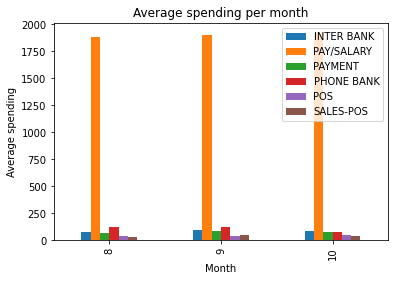

In [189]:
dat=monthly_avg_spending_for_plt.set_index(['month', 'transaction description'])
dat.unstack().plot(kind='bar')
plt.legend(['INTER BANK',	
'PAY/SALARY',	
'PAYMENT',	
'PHONE BANK',
'POS',	
'SALES-POS'])
plt.title("Average spending per month")
plt.xlabel("Month")
plt.ylabel("Average spending");

In [28]:
monthly_avg_volume=anz_df.groupby([pd.DatetimeIndex(anz_df['date']).month, 'txn_description'])['amount'].count().to_frame("mean_volume")
monthly_avg_volume.rename({'date':'month'}, axis=1, inplace=True)
monthly_avg_volume.sort_values(['txn_description', 'date'], inplace=True)

In [29]:
monthly_avg_volume

,,mean_volume
date,txn_description,
8,INTER BANK,240
9,INTER BANK,240
10,INTER BANK,262
8,PAY/SALARY,298
9,PAY/SALARY,272
10,PAY/SALARY,313
8,PAYMENT,837
9,PAYMENT,867
10,PAYMENT,896


In [187]:
import numpy as np
monthly_avg_volume_for_plt = pd.DataFrame(list(monthly_avg_volume.to_records().tolist()), 
    columns=['month', 'transaction description', 'average monthly volume']
)

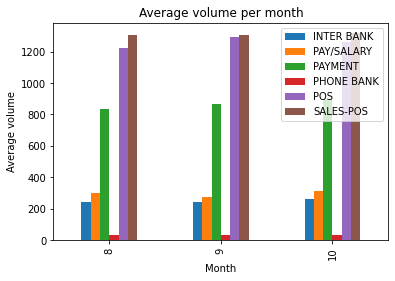

In [190]:
datv=monthly_avg_volume_for_plt.set_index(['month', 'transaction description'])
datv.unstack().plot(kind='bar')
plt.legend(['INTER BANK',	
'PAY/SALARY',	
'PAYMENT',	
'PHONE BANK',
'POS',	
'SALES-POS'])
plt.title("Average volume per month")
plt.xlabel("Month")
plt.ylabel("Average volume");

In [30]:
daily_avg_spending=anz_df.groupby(['date', 'txn_description'])['amount'].count().to_frame("mean_volume")
daily_avg_spending.rename({'date':'month'}, axis=1, inplace=True)
daily_avg_spending.sort_values('date', inplace=True)

In [31]:
daily_avg_spending

mean_volume
date       txn_description             
2018-08-01 INTER BANK                10
           PAY/SALARY                13
           PAYMENT                   29
           PHONE BANK                 1
           POS                       49
...                                 ...
2018-10-31 INTER BANK                10
           PAY/SALARY                11
           PAYMENT                   25
           PHONE BANK                 2
           SALES-POS                 52

[489 rows x 1 columns]

In [227]:
daily_avg_spending_u=anz_df.groupby(['date'])['amount'].count().to_frame("mean_volume")

In [228]:
daily_avg_spending_u

,mean_volume
date,
2018-08-01,137
2018-08-02,152
2018-08-03,157
2018-08-04,118
2018-08-05,100
...,...
2018-10-27,139
2018-10-28,143
2018-10-29,102


In [230]:
daily_avg_spending_u.loc[daily_avg_spending_u['mean_volume']. idxmax()]

mean_volume    174
Name: 2018-09-28 00:00:00, dtype: int64

In [231]:
daily_avg_spending_u.loc[daily_avg_spending_u['mean_volume']. idxmin()]

mean_volume    89
Name: 2018-10-30 00:00:00, dtype: int64

In [32]:
weekly_avg_spending=anz_df.groupby([pd.DatetimeIndex(anz_df['date']).week, 'txn_description'])['amount'].count().to_frame("mean_volume")
weekly_avg_spending.rename({'date':'month'}, axis=1, inplace=True)
weekly_avg_spending.sort_values('date', inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


In [33]:
weekly_avg_spending

mean_volume
date txn_description             
31   INTER BANK                39
     PAY/SALARY                38
     PAYMENT                  134
     PHONE BANK                 4
     POS                      229
...                           ...
44   INTER BANK                23
     PAY/SALARY                39
     PAYMENT                   61
     PHONE BANK                 3
     SALES-POS                103

[84 rows x 1 columns]

### **Basic insights**
* Average transaction amount is 187.95 AUD
* Average balance amount is 14705.41 AUD
* Average age of customer is 30.58

### **Location Data Analysis**


In [34]:
states = anz_df.groupby(['merchant_state'])['merchant_suburb'].size().to_frame('count')
states = states.sort_values('count', ascending = False)
total_count=states["count"].sum()
states["percent"]=(states["count"]/total_count)*100

In [35]:
states

,count,percent
merchant_state,,
NSW,6495,53.931745
VIC,2131,17.694927
QLD,1556,12.920369
WA,1100,9.133937
SA,415,3.445985
NT,205,1.702234
ACT,73,0.606161
TAS,68,0.564643


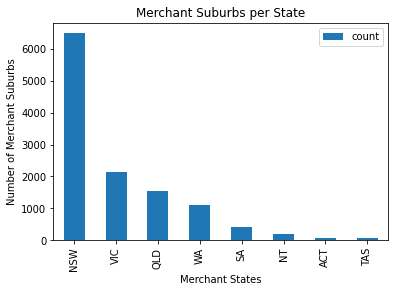

In [45]:
states.plot.bar(y="count");
# ax.set_xticklabels(months)
plt.title("Merchant Suburbs per State")
plt.xlabel("Merchant States")
plt.ylabel("Number of Merchant Suburbs");

* When it comes to the distribution of merchants in Australia, NSW and VIC are the two states where most merchants locate, the proportion of merchants in there is 53.9% and 17.7% respectively. QLD ranked third with 12.9% of merchants and WA ranked 4th with 9.1%.

### **Salary Data Analysis Based on Gender**


In [211]:
salary_gender_df=(anz_df.loc[anz_df['txn_description']=='PAY/SALARY']).groupby('gender')['amount'].mean().to_frame("average salary")

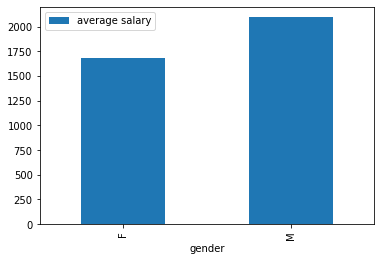

In [213]:
salary_gender_df.plot(kind='bar')

The above analysis shows that the average salary of men is greater than that of women.

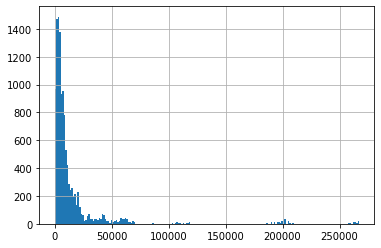

In [192]:
anz_df["balance"].hist(bins=200)

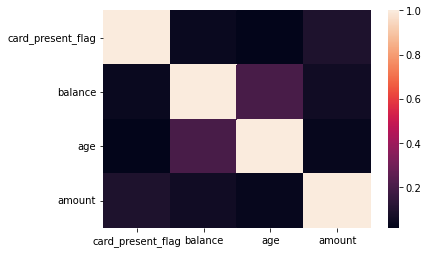

In [193]:
# Looking at mulitcollinearity
sns.heatmap(anz_df.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

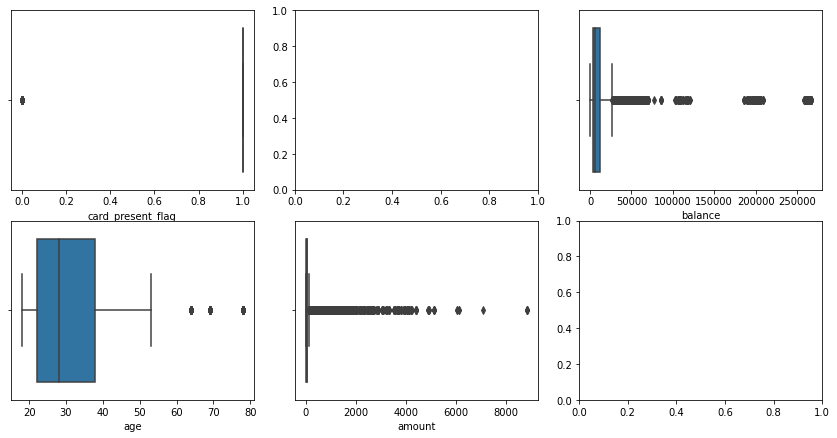

In [194]:
#Another way to detect outliers are to use box plots and scatter plots.
#for the numeric data
fig, ax = plt.subplots(2, 3)
# Setting height and width of subplots
fig.set_figheight(6)
fig.set_figwidth(12)
# Adding spacing between boxes
fig.tight_layout(h_pad=True, w_pad=True)
sns.boxplot(anz_df["card_present_flag"], ax=ax[0, 0])
# sns.boxplot(anz_df["merchant_code"], ax=ax[0, 1])
sns.boxplot(anz_df["balance"], ax=ax[0, 2])
sns.boxplot(anz_df["age"], ax=ax[1, 0])
sns.boxplot(anz_df["amount"], ax=ax[1, 1])

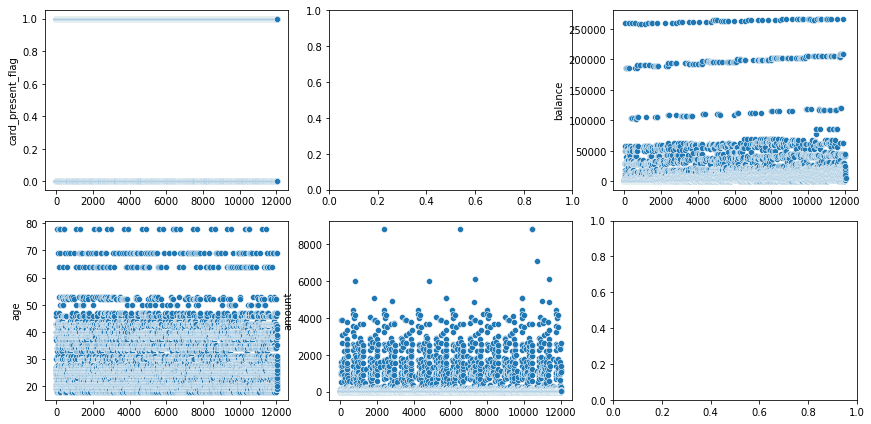

In [195]:
fig, ax = plt.subplots(2, 3)
# Setting height and width of subplots
fig.set_figheight(6)
fig.set_figwidth(12)
# Adding spacing between boxes
fig.tight_layout(h_pad=True, w_pad=True)
sns.scatterplot(data=anz_df["card_present_flag"], ax=ax[0, 0])
# sns.scatterplot(data=anz_df["merchant_code"], ax=ax[0, 1])
sns.scatterplot(data=anz_df["balance"], ax=ax[0, 2])
sns.scatterplot(data=anz_df["age"], ax=ax[1, 0])
sns.scatterplot(data=anz_df["amount"], ax=ax[1, 1])
plt.show()